<a href="https://colab.research.google.com/github/RafaelTorresCH/senalesysistemas_/blob/main/PARCIAL_1/PREGUNTA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Parcial 1 - Sistemas y Señales (2025-1)
##**Pregunta 2**
### **Nombre:** Rafael Ricardo Torres Choperena
---




## 1. Señal analógica

La señal que nos dan combina tres componentes armónicas distintas. Se escribe:

$$
x(t) = 3\cos\bigl(1000\pi\,t\bigr) + 5\sin\bigl(2000\pi\,t\bigr) + 10\cos\bigl(11000\pi\,t\bigr).
$$

Cada término aporta una frecuencia concreta y un peso distinto en la forma final de la onda.

---

## 2. Frecuencias presentes

Calculamos la frecuencia de cada término para saber hasta dónde llega la señal:

- $f_1 = \dfrac{1000\pi}{2\pi} = 500\ \mathrm{Hz}$, correspondiente al primer coseno.  
- $f_2 = \dfrac{2000\pi}{2\pi} = 1000\ \mathrm{Hz}$, del seno intermedio.  
- $f_3 = \dfrac{11000\pi}{2\pi} = 5500\ \mathrm{Hz}$, del segundo coseno de mayor frecuencia.  

Así identificamos $f_{\max}=5500\,$Hz como el componente que dicta el criterio de muestreo.

---

## 3. Muestreo propuesto

El examen dice usar:

$$
f_s = 5000\ \mathrm{Hz},
$$

es decir, tomamos 5000 muestras por segundo. Esto define el intervalo de muestreo $T_s = 1/f_s$.

---

## 4. Criterio de Nyquist

Para que no haya aliasing, necesitamos:

$$
f_s \;\ge\; 2\,f_{\max}
\quad\Longrightarrow\quad
f_s \;\ge\; 2 \times 5500 = 11000\ \mathrm{Hz}.
$$

Como $5000 < 11000$, la frecuencia elegida es insuficiente. Resultado: **aliasing**, que distorsiona la señal discreta.

---

## 5. Solución recomendada

La forma más sencilla de eliminar el aliasing es subir $f_s$ por encima de $2 f_{\max}$. Por ejemplo:

$$
f_s = 12000\ \mathrm{Hz},
$$

con lo cual ya cumplimos $12000 > 11000$ y la discretización representa correctamente todas las componentes de la señal.


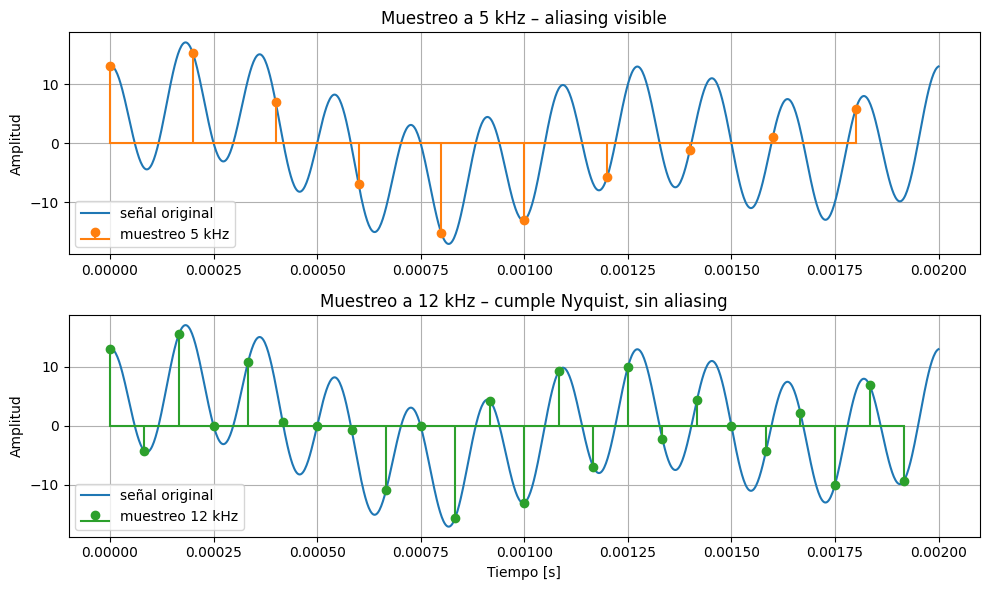

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# definimos el tiempo continuo de 0 a 2 ms para ver un par de ciclos
tiempo = np.linspace(0, 0.002, 1000)

# creamos la señal original con tres frecuencias fáciles de recordar: 500 Hz, 1000 Hz y 5500 Hz
senal = (
    3 * np.cos(1000 * np.pi * tiempo) +
    5 * np.sin(2000 * np.pi * tiempo) +
    10 * np.cos(11000 * np.pi * tiempo)
)

# ahora muestreamos lento, a 5 kHz, y vemos aliasing
fs1 = 5000            # muestras por segundo
dt1 = 1 / fs1         # tiempo entre cada muestra
tiempo1 = np.arange(0, 0.002, dt1)
senal1 = (
    3 * np.cos(1000 * np.pi * tiempo1) +
    5 * np.sin(2000 * np.pi * tiempo1) +
    10 * np.cos(11000 * np.pi * tiempo1)
)

# luego muestreamos rápido, a 12 kHz, y todo se ve bien sin aliasing
fs2 = 12000           # muestras por segundo
dt2 = 1 / fs2
tiempo2 = np.arange(0, 0.002, dt2)
senal2 = (
    3 * np.cos(1000 * np.pi * tiempo2) +
    5 * np.sin(2000 * np.pi * tiempo2) +
    10 * np.cos(11000 * np.pi * tiempo2)
)

# finalmente, mostramos la comparación en dos gráficos sencillos
plt.figure(figsize=(10, 6))

# primer gráfico: muestreo lento (aliasing)
plt.subplot(2, 1, 1)
plt.plot(tiempo, senal, label='señal original')
plt.stem(tiempo1, senal1, markerfmt='C1o', linefmt='C1-', basefmt='C1-', label='muestreo 5 kHz')
plt.title('Muestreo a 5 kHz – aliasing visible')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

# segundo gráfico: muestreo rápido (sin aliasing)
plt.subplot(2, 1, 2)
plt.plot(tiempo, senal, label='señal original')
plt.stem(tiempo2, senal2, markerfmt='C2o', linefmt='C2-', basefmt='C2-', label='muestreo 12 kHz')
plt.title('Muestreo a 12 kHz – cumple Nyquist, sin aliasing')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
